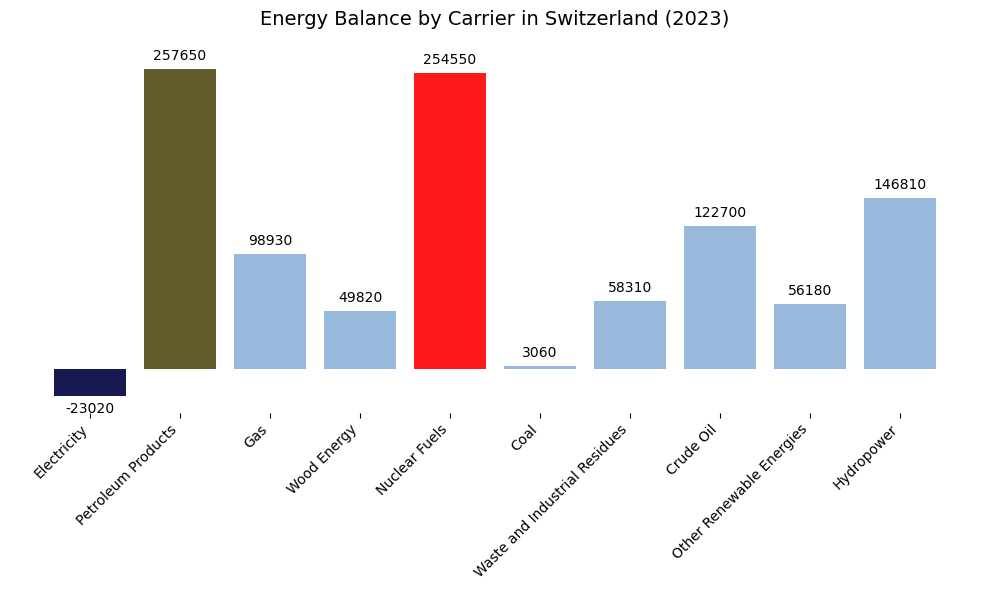

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table
data = {
    "Energy Carrier": [
        "Electricity", "Petroleum Products", "District Heating", "Gas", "Wood Energy",
        "Nuclear Fuels", "Coal", "Waste and Industrial Residues", "Crude Oil",
        "Other Renewable Energies", "Hydropower"
    ],
    "TJ": [
        -23020, 257650, 0, 98930, 49820, 254550, 3060, 58310, 122700, 56180, 146810
    ]
}

# Custom color palette for specific energy carriers
custom_colors = {
    "Electricity": "#00003f",  # Very dark blue
    "Petroleum Products": "#524814",  # Light green for diesel
    "Nuclear Fuels": "red"  # Following the palette for Nuclear
}

# Default color for other energy carriers
default_color = "#8CB3D9"  # Muted blue

# Create a DataFrame
df = pd.DataFrame(data)

# Filter out entries with no TJ value
df = df[df['TJ'] != 0]

# Assign colors based on the custom palette
colors = [custom_colors.get(carrier, default_color) for carrier in df["Energy Carrier"]]

# Create the bar chart without black outlines
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Energy Carrier"], df["TJ"], color=colors, alpha=0.9)
plt.title("Energy Balance by Carrier in Switzerland (2023)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")

# Add values above or below the bars
for bar, carrier in zip(bars, df["Energy Carrier"]):
    height = bar.get_height()
    if height < 0:  # For negative bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            height - 0.02 * abs(max(df['TJ'])),  # Position below the negative bar
            f"{height:.0f}", fontsize=10, ha='center', va='top', color='black'
        )
    else:  # For positive bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            height + 0.02 * abs(max(df['TJ'])),  # Position above the positive bar
            f"{height:.0f}", fontsize=10, ha='center', va='bottom', color='black'
        )

# Remove the Y-axis scale
plt.yticks([])

# Remove the chart frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove X-axis label
plt.xlabel(None)

# Display the chart
plt.tight_layout()
plt.savefig("energy_balance.pdf")
plt.show()
